In [6]:
from numpy import unique
from numpy import where
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.cluster import AffinityPropagation
import pandas as pd
from sklearn import cluster, datasets, mixture
from sklearn.decomposition import PCA
from sklearn.decomposition import NMF
from sklearn.feature_selection import VarianceThreshold
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage, cut_tree, fcluster
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics import silhouette_score

ModuleNotFoundError: No module named 'umap'

In [2]:
# Load the data
# res_hrd_genes are the normalized counts of the HRR genes and res_all includes all the genes
res_hrd_genes = pd.read_csv('../data/res_hrdgenes.csv', sep = ',', header = 0, index_col=0)
clinical = pd.read_csv('../data/gene_expression/prepared_data/clinical_BRCA.csv', sep = ',', header = 0, index_col=0)
res_all = pd.read_csv('../data/res_all.csv', sep = ',', header = 0, index_col=0)

In [3]:
res_hrd_genes_t = res_hrd_genes.T
res_all_t = res_all.T

In [4]:
print(list(clinical['HRD_sum'].T))
hrds_values = list(clinical['HRD_sum'].T)
subtypes = list(clinical['Subtype'].T)

[53, 39, 14, 38, 34, 22, 13, 12, 31, 36, 36, 20, 1, 14, 35, 15, 13, 38, 15, 7, 41, 18, 44, 12, 11, 55, 50, 34, 0, 14, 44, 23, 50, 29, 35, 5, 18, 50, 10, 68, 12, 28, 44, 45, 31, 17, 38, 88, 41, 24, 72, 0, 11, 61, 79, 24, 37, 15, 13, 26, 57, 24, 33, 57, 10, 72, 29, 14, 23, 7, 16, 26, 24, 15, 69, 10, 41, 52, 15, 35, 46, 9, 13, 36, 16, 4, 10, 12, 34, 4, 80, 47, 7, 11, 5, 21, 7, 18, 19, 52, 5, 40, 17, 9, 7, 58, 38, 50, 32, 30, 1, 8, 11, 34, 27, 81, 13, 1, 3, 47, 40, 17, 70, 68, 28, 79, 19, 25, 18, 36, 1, 33, 24, 71, 5, 6, 13, 68, 72, 41, 44, 15, 9, 52, 13, 28, 38, 41, 5, 19, 19, 30, 32, 40, 20, 20, 73, 32, 26, 43, 1, 8, 52, 25, 19, 0, 73, 6, 4, 30, 21, 16, 12, 32, 13, 0, 28, 39, 85, 33, 7, 36, 33, 7, 18, 47, 69, 89, 11, 28, 11, 14, 10, 54, 24, 78, 25, 25, 40, 6, 20, 39, 20, 75, 67, 58, 46, 5, 23, 55, 11, 67, 22, 16, 6, 46, 61, 74, 26, 35, 29, 6, 32, 11, 6, 1, 5, 60, 10, 16, 17, 79, 8, 7, 55, 41, 16, 23, 47, 27, 33, 6, 0, 37, 65, 40, 22, 8, 27, 44, 48, 6, 33, 36, 13, 6, 17, 24, 6, 16, 44, 10

In [48]:
print(type(hrds_values[0]))

<class 'int'>


In [11]:
## Does not work

model = AffinityPropagation(damping=0.7)


model.fit(res_hrd_genes_t)
result = model.predict(res_hrd_genes_t)
clusters = unique(result)
# plot the clusters
for cluster in clusters:
    # get data points that fall in this cluster
    index = where(result == cluster)
    print(index)
    # make the plot
    pyplot.scatter(res_hrd_genes[index,:], res_hrd_genes[index,:])

# show the plot
pyplot.show()

In [6]:
spectral = cluster.SpectralClustering(n_clusters=2,eigen_solver="arpack",affinity="nearest_neighbors",)

In [7]:
spectral.fit(res_hrd_genes_t)

SpectralClustering(affinity='nearest_neighbors', eigen_solver='arpack',
                   n_clusters=2)

In [8]:
y_pred = spectral.labels_.astype(int)

In [9]:
print(y_pred)

[1 1 0 1 0 1 0 0 1 1 1 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 1 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 1 1 1 0 1 0 0 0 1 1 1 0 0 1 0 1 1 1 0 0 0 1 0 0 1 0 0 0
 1 0 1 1 0 0 1 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 1 1 0 1
 0 0 0 0 1 0 1 0 0 1 0 1 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 1 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0
 1 0 1 0 0 0 0 0 1 0 1 0 1 0 0 0 1 1 1 1 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 1 0
 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 1 1 0 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0
 0 0 0 0 1 0 0 1 0 0 0 0 1 1 0 0 1 1 1 0 0 0 1 0 0 0 0 0 1 1 0 1 0 0 0 0 1
 0 1 1 0 0 1 1 1 0 0 0 0 0 1 1 0 0 0 0 1 0 1 1 0 0 1 0 0 1 0 0 0 1 1 0 0 1
 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 1 1 1 0 1 0 1 1
 0 0 0 0 1 0 0 0 1 1 0 1 0 0 1 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0
 1 0 1 0 0 0 1 0 0 1 0 1 0 1 0 1 0 0 0 0 1 0 1 1 1 0 1 0 1 1 0 0 0 1 0 0 0
 0 0 0 0 1 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 1 1 0 1 1 0 1 0
 1 0 1 1 0 0 0 0 0 1 1 0 

In [10]:
pca = PCA(n_components=2)
data_2d = pca.fit_transform(res_hrd_genes_t)

In [11]:
mask0 = y_pred == 0
mask1 = y_pred == 1

In [12]:
print(mask0.astype(int))

[0 0 1 0 1 0 1 1 0 0 0 1 1 1 0 1 1 1 1 1 1 1 0 1 0 1 1 1 0 1 0 1 1 1 1 1 1
 1 1 0 1 1 1 1 1 1 0 0 0 1 0 1 1 1 0 0 0 1 1 0 1 0 0 0 1 1 1 0 1 1 0 1 1 1
 0 1 0 0 1 1 0 1 1 0 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 0 1 0 1 1 1 1 0 0 0 1 0
 1 1 1 1 0 1 0 1 1 0 1 0 0 1 0 1 1 1 1 1 1 1 0 1 1 1 1 0 1 0 1 1 0 1 1 1 0
 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 0 1 1 0 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1
 0 1 0 1 1 1 1 1 0 1 0 1 0 1 1 1 0 0 0 0 1 1 1 1 0 1 0 1 1 1 1 1 0 1 1 0 1
 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 1 0 0 1 1 1 1
 1 1 1 1 0 1 1 0 1 1 1 1 0 0 1 1 0 0 0 1 1 1 0 1 1 1 1 1 0 0 1 0 1 1 1 1 0
 1 0 0 1 1 0 0 0 1 1 1 1 1 0 0 1 1 1 1 0 1 0 0 1 1 0 1 1 0 1 1 1 0 0 1 1 0
 0 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 0 0 0 1 0 1 0 0
 1 1 1 1 0 1 1 1 0 0 1 0 1 1 0 1 1 1 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 1 0 1
 0 1 0 1 1 1 0 1 1 0 1 0 1 0 1 0 1 1 1 1 0 1 0 0 0 1 0 1 0 0 1 1 1 0 1 1 1
 1 1 1 1 0 1 0 1 1 1 0 0 1 1 1 1 1 0 1 1 1 1 1 1 0 0 1 1 1 0 0 1 0 0 1 0 1
 0 1 0 0 1 1 1 1 1 0 0 1 

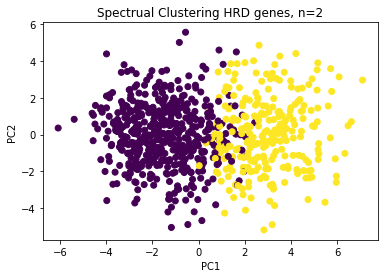

In [38]:
plt.figure(facecolor=(1, 1, 1))
plt.scatter(data_2d[:, 0], data_2d[:, 1], c = y_pred)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Spectrual Clustering HRD genes, n=2')

plt.savefig("../data/figures/BRCA_cohort/clustering/specturalClustering_HRDgenes.png", bbox_inches='tight')
plt.show()


In [14]:
hrd_0 = list()
hrd_1 = list()
for i,val in enumerate(y_pred):
    if val == 0:
        hrd_0.append(hrds_values[i])
    else:
        hrd_1.append(hrds_values[i])

In [20]:
print(len(hrd_1))

255


In [15]:
cmap = plt.cm.get_cmap('RdBu')

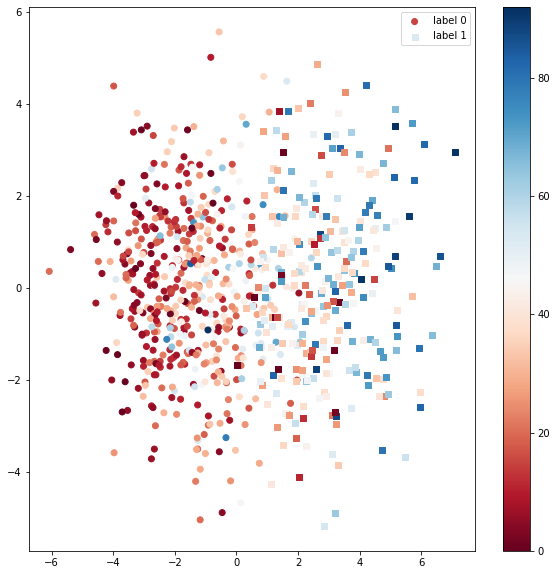

In [16]:
plt.figure(figsize=(10,10))
plt.scatter(data_2d[mask0, 0], data_2d[mask0, 1], c=hrd_0, cmap=cmap, marker='o', label='label 0')
plt.scatter(data_2d[mask1, 0], data_2d[mask1, 1], c=hrd_1, cmap=cmap, marker='s', label='label 1')
plt.legend()
plt.colorbar()

In [32]:
pca = PCA(n_components=3)
 
pca.fit(res_hrd_genes_t)
 
pca_bcancer = pca.transform(res_hrd_genes_t)

In [33]:
Xax = pca_bcancer[:,0]
Yax = pca_bcancer[:,1]
Zax = pca_bcancer[:,2]

Text(0.5, 0, 'PC3')

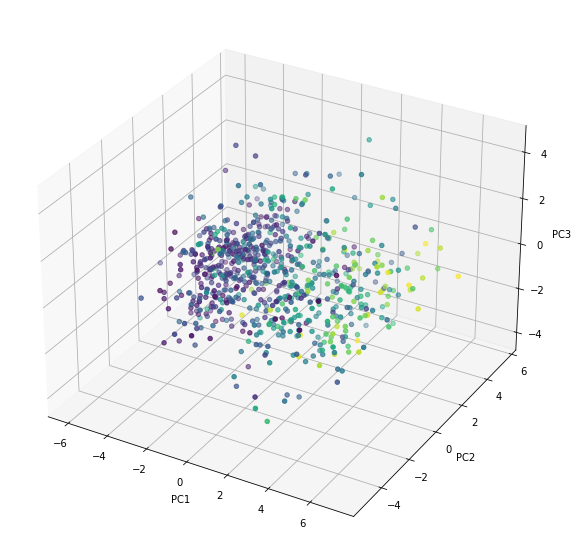

In [40]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(Xax, Yax, Zax, c = hrds_values)
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")

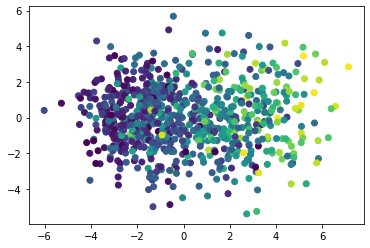

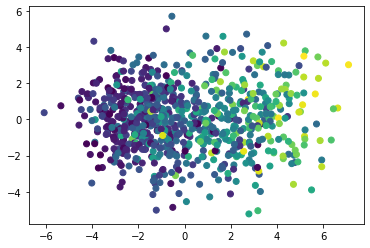

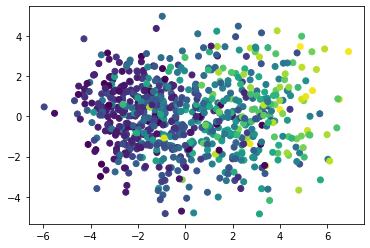

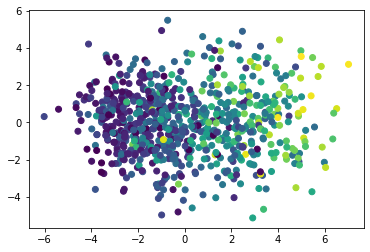

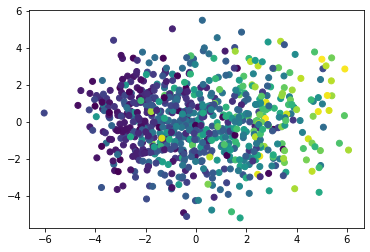

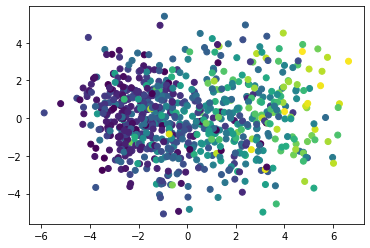

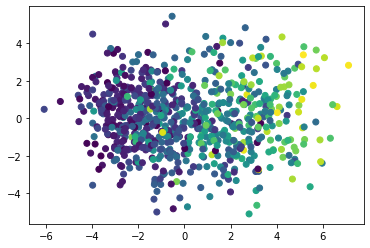

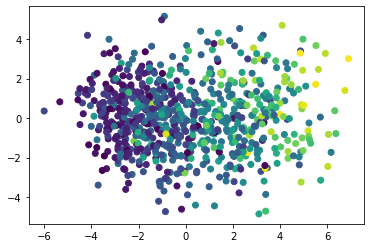

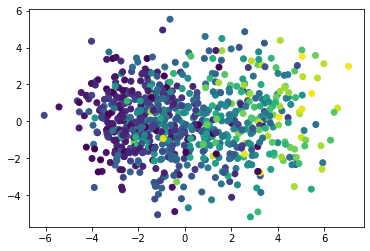

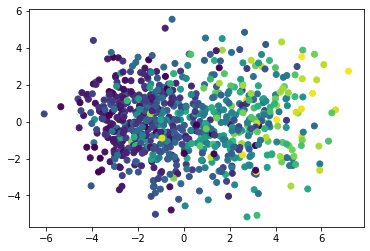

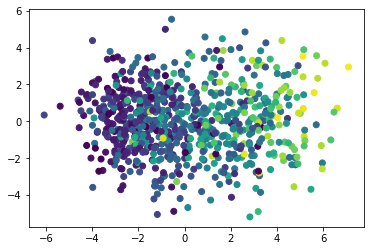

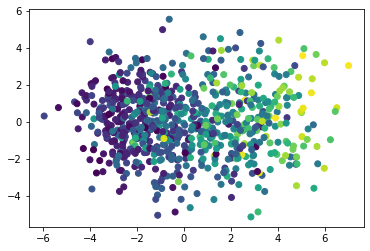

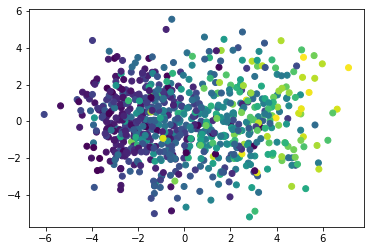

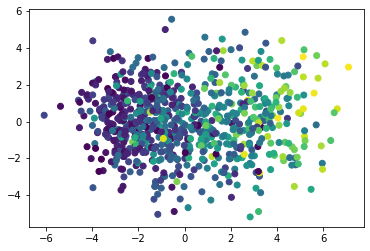

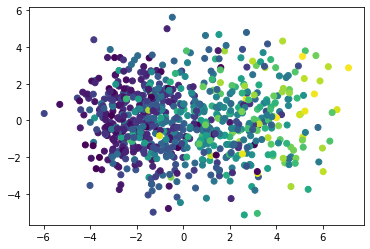

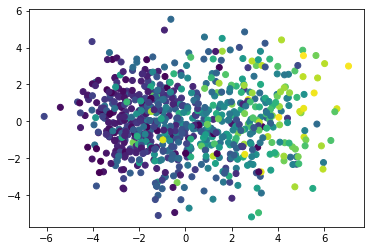

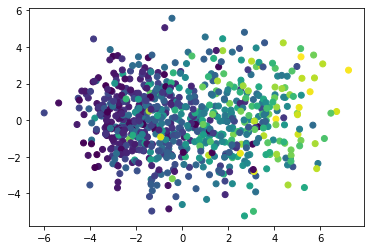

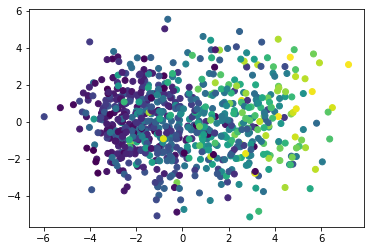

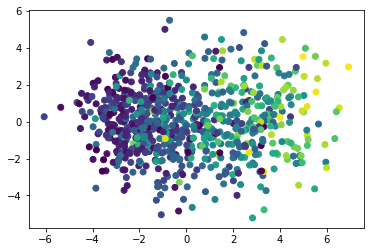

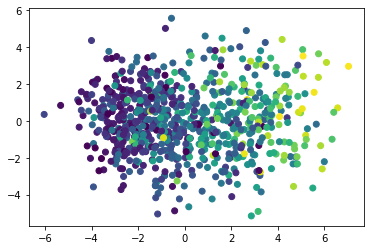

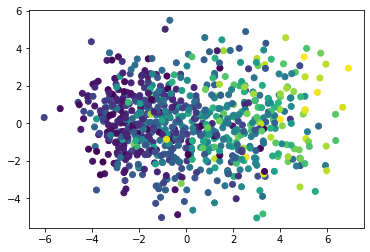

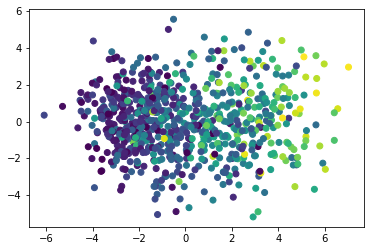

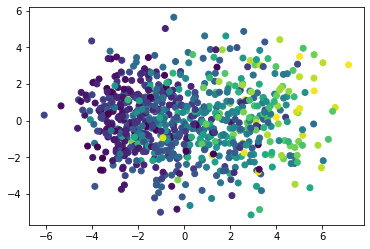

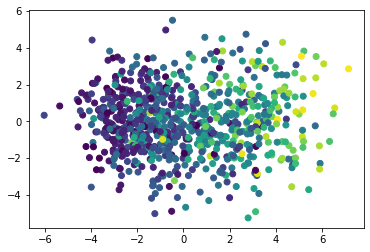

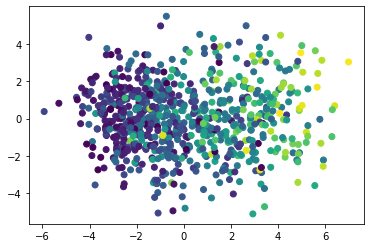

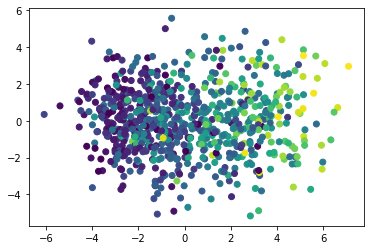

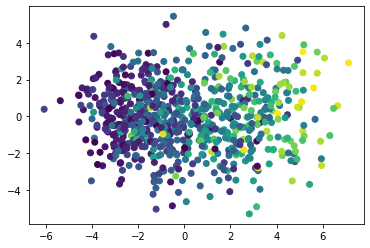

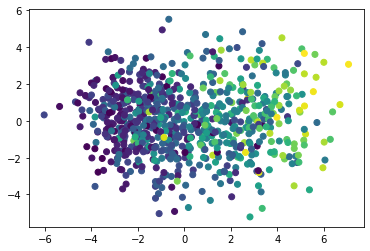

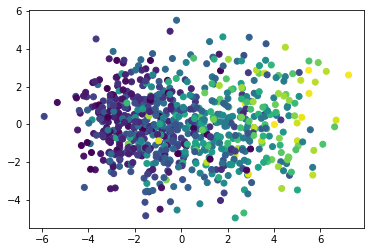

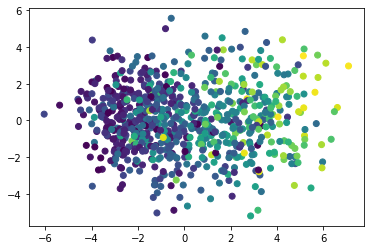

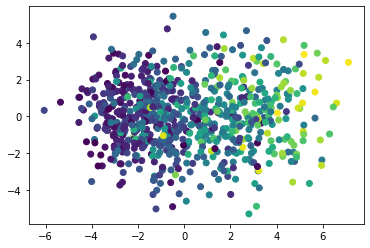

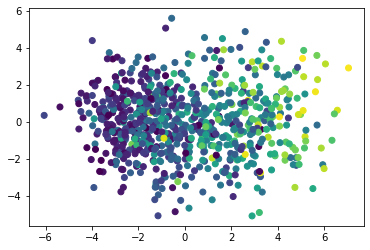

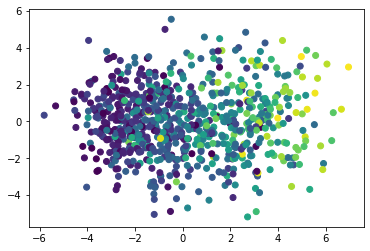

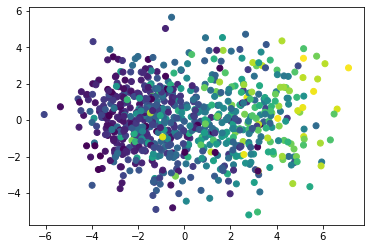

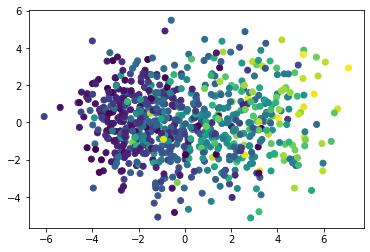

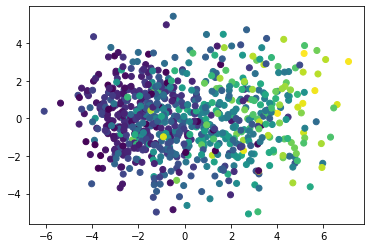

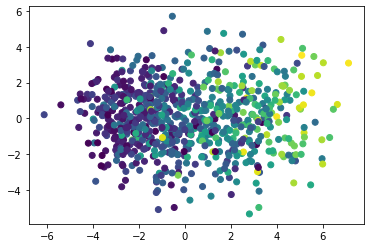

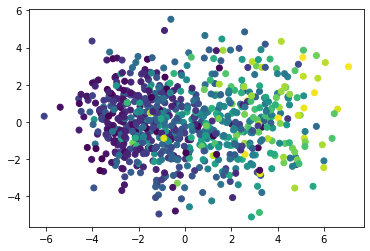

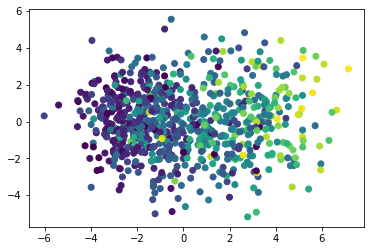

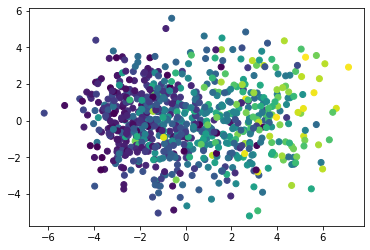

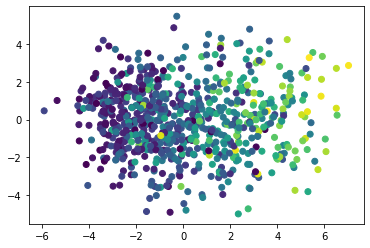

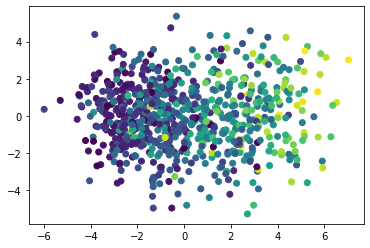

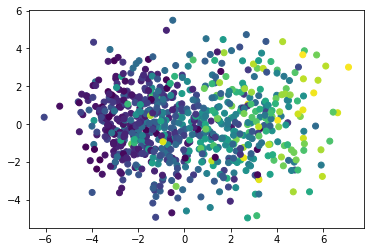

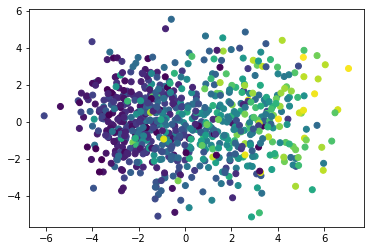

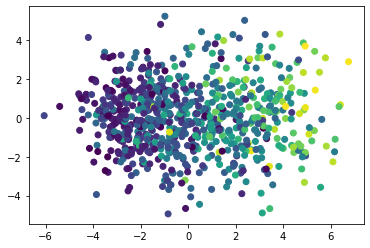

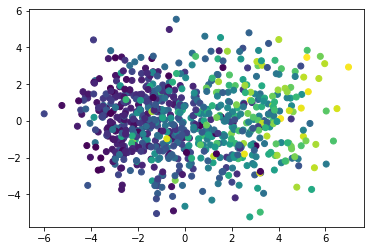

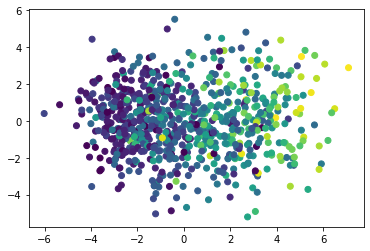

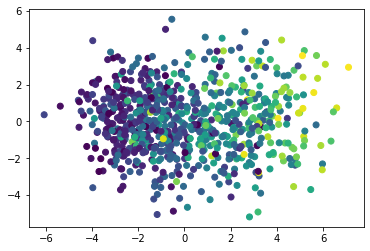

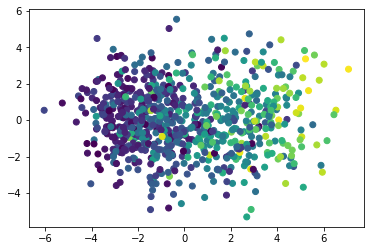

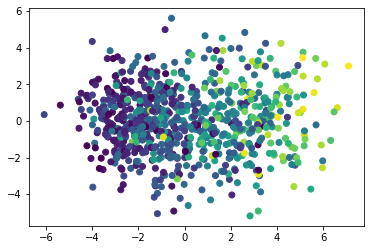

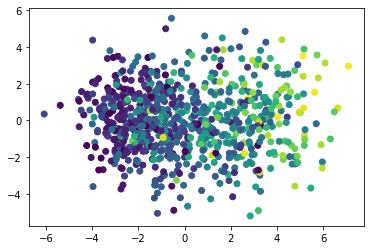

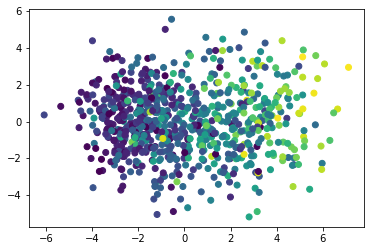

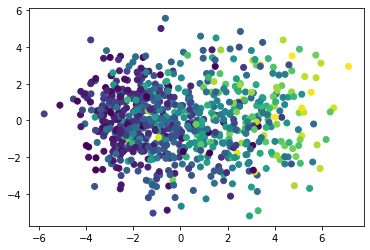

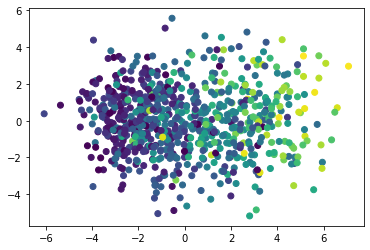

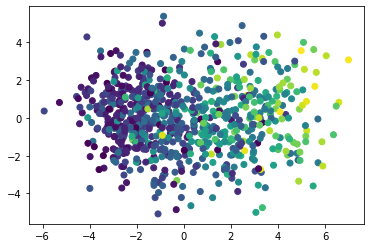

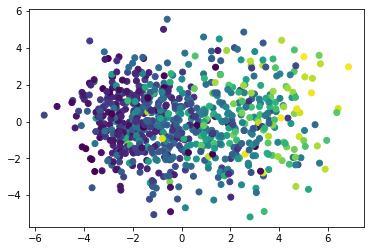

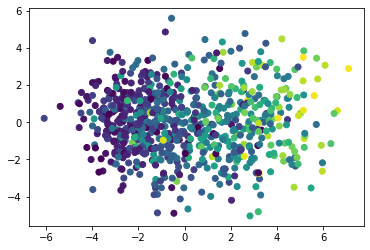

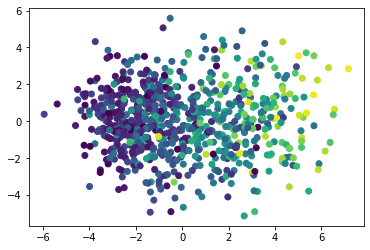

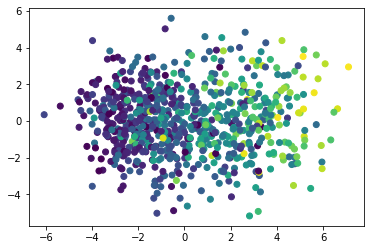

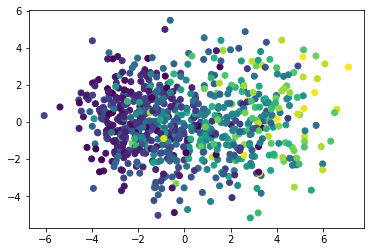

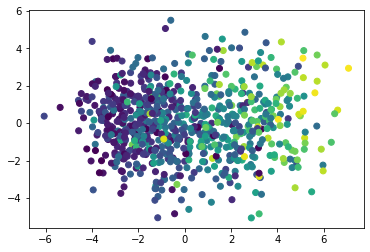

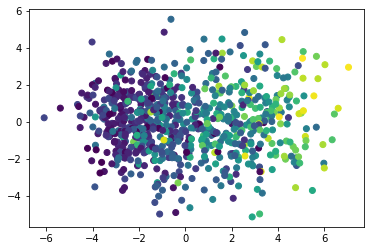

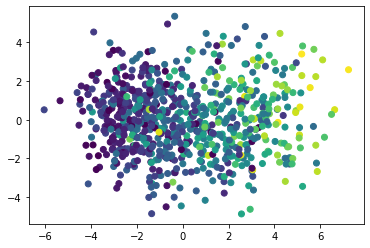

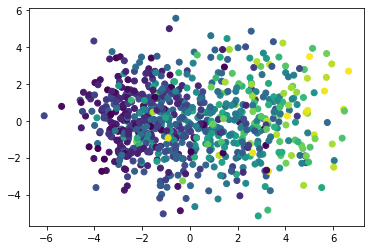

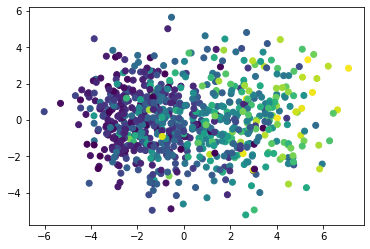

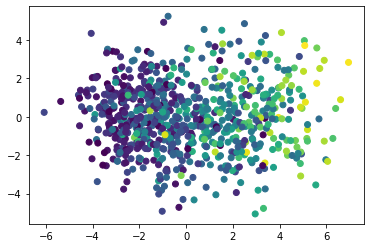

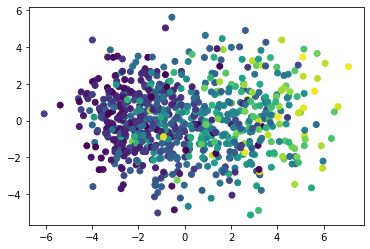

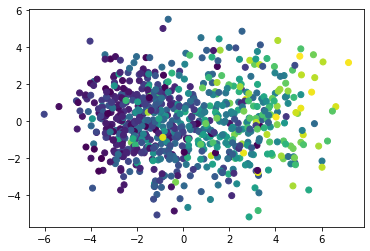

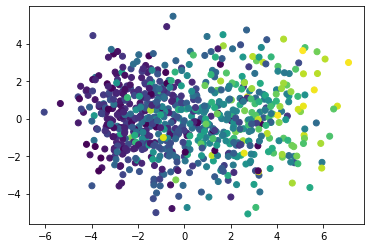

In [47]:

for i,col in enumerate(res_hrd_genes_t):
    plt.figure(i)
    sub_df = res_hrd_genes_t.drop(columns = col)
    pca = PCA(n_components=2)
    data_2d = pca.fit_transform(sub_df)
    plt.scatter(data_2d[:, 0], data_2d[:, 1], c = hrds_values)
    plt.colorbar()
    plt.show()

# Variance Threshold filtering

In [39]:
selector = VarianceThreshold(threshold = 3)
#res_hrd_genes_t_fil = selector.fit_transform(res_hrd_genes_t)


#_ = selector.fit(res_hrd_genes_t)

#mask = selector.get_support()
#res_hrd_genes_t_fil = res_hrd_genes_t.loc[:, mask]

res_all_t_fil = selector.fit_transform(res_all_t)
_ = selector.fit(res_all_t)

mask = selector.get_support()
res_all_t_fil = res_all_t.loc[:, mask]

In [134]:
print(res_hrd_genes_t_fil.shape)
print(res_hrd_genes_t.shape)

print(res_all_t_fil.shape)
print(res_all_t.shape)

(747, 1)
(747, 69)
(747, 470)
(747, 20445)


In [40]:
pca = PCA(n_components=3)
#data_2d = pca.fit_transform(res_hrd_genes_t_fil)
data_2d = pca.fit_transform(res_all_t_fil)

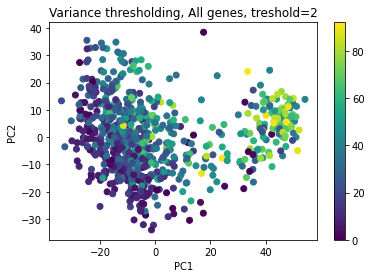

In [41]:
plt.scatter(data_2d[:, 0], data_2d[:, 1], c = hrds_values)
plt.colorbar()
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Variance thresholding, All genes, treshold=2')

plt.savefig("../data/figures/BRCA_cohort/clustering/varianceThresholding_Allgenes.png", bbox_inches='tight')
plt.show()

# Drop correlated features

In [12]:
cor_matrix = res_all_t.corr().abs()
#cor_matrix = res_hrd_genes_t.corr().abs()
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.95)] # quite low generally use 0.95 but none is drop this high
#df1 = res_hrd_genes_t.drop(columns = to_drop)
df1 = res_all_t.drop(columns = to_drop)

/tmp/ipykernel_73922/1218146668.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))


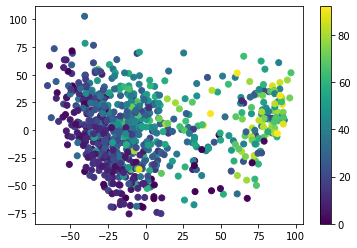

In [13]:
pca = PCA(n_components=2)
data_2d = pca.fit_transform(df1)
plt.scatter(data_2d[:, 0], data_2d[:, 1], c = hrds_values)

plt.colorbar()
plt.show()

# Non negative matrix factorization

In [42]:
model = NMF(n_components=2, init='random', random_state=0)
W = model.fit_transform(res_hrd_genes_t)
W = model.fit_transform(res_all_t)
W = model.fit_transform(res_all_t_fil)
#W = model.fit_transform(res_hrd_genes_t_fil)

/home/USZ/plialacc/Storage/anaconda3/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:1637: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


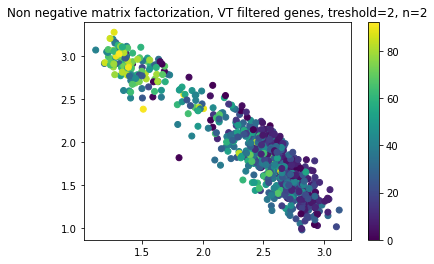

In [44]:
plt.scatter(W[:,0],W[:,1], c= hrds_values )

plt.title('Non negative matrix factorization, VT filtered genes, treshold=2, n=2')
plt.colorbar()
plt.savefig("../data/figures/BRCA_cohort/clustering/nonNegativeMatrixFactorization_Allgenes_filteredVT3.png", bbox_inches='tight')

# Hierarchichal clustering

In [139]:
#data = res_hrd_genes_t.copy()
#data = res_all_t.copy()
data = res_hrd_genes_t_fil.copy()
data = res_all_t_fil.copy()

In [116]:
linkage_data = linkage(data, method='ward', metric='euclidean')

In [100]:
print(linkage_data)

[[ 180.          485.            2.32563004    2.        ]
 [ 158.          184.            2.37227505    2.        ]
 [ 194.          424.            2.37646143    2.        ]
 ...
 [1484.         1489.            9.64371947  744.        ]
 [1488.         1490.            9.68038593  746.        ]
 [ 298.         1491.           11.17005369  747.        ]]


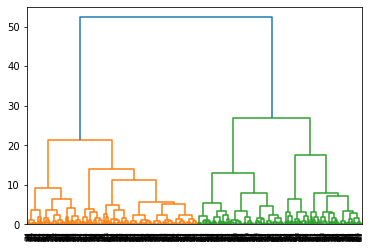

In [55]:
dendrogram(linkage_data)
plt.show()

In [117]:
num_clusters = 2

# Obtain the cluster assignments using the fcluster function
cluster_assignments = fcluster(linkage_data, num_clusters, criterion='maxclust')


In [120]:
print(cluster_assignments)

[2 1 2 1 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 1 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 1 1 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2
 1 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 1 2 1 2 2 2 2 2 1 1 2 1
 2 2 2 2 1 2 1 2 2 2 2 1 1 2 1 2 2 2 2 2 2 2 1 2 2 2 2 1 2 2 2 2 1 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2
 2 2 2 2 2 2 2 1 2 2 1 2 1 2 2 2 1 1 1 1 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 1 2 2 2 1 2 2 2 2 2 2 1 2 2 2 2 1 1 2 2 2 2 2 2 2 2 1 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 1 2 2 2 1 1 2 2 2 2 2 2 1 2 1 2 2 2 2 2
 2 1 1 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 1 2 2 2 2 2 1 2 2 2 2 2 2 2 1
 2 2 2 2 1 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 1 1 1 2 2 2 1 2
 2 2 2 2 2 2 2 2 2 1 2 1 2 2 1 2 2 2 2 2 2 1 2 2 2 1 2 2 2 2 2 2 2 2 2 1 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 1 2 2 2 2 2 1 2 1 2 2 2 2 2 2 2 2
 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 2 2 2 2 2 2
 2 2 1 1 2 2 2 2 2 2 1 2 

In [56]:
hrd_0 = list()
hrd_1 = list()
subtype_0 = list()
subtype_1 = list()
for i,val in enumerate(cluster_assignments):
    if val == 1:
        hrd_0.append(hrds_values[i])
        subtype_0.append(subtypes[i])
    else:
        hrd_1.append(hrds_values[i])
        subtype_1.append(subtypes[i])

['BRCA_LumB', 'BRCA_Basal', 'BRCA_Basal', 'BRCA_LumA', 'BRCA_Basal', 'BRCA_Her2', 'BRCA_LumB', 'BRCA_LumB', 'BRCA_LumB', 'BRCA_LumB', 'undefined', 'BRCA_LumA', 'BRCA_LumB', 'BRCA_Her2', 'BRCA_Basal', 'BRCA_LumA', 'BRCA_Basal', 'BRCA_Basal', 'BRCA_LumA', 'BRCA_LumA', 'BRCA_LumA', 'BRCA_LumA', 'BRCA_Her2', 'BRCA_Her2', 'BRCA_Basal', 'BRCA_Basal', 'BRCA_Basal', 'BRCA_LumB', 'BRCA_Her2', 'BRCA_Her2', 'BRCA_Her2', 'BRCA_LumA', 'BRCA_Her2', 'BRCA_LumA', 'BRCA_LumB', 'BRCA_LumB', 'BRCA_LumA', 'BRCA_LumB', 'BRCA_LumA', 'BRCA_Basal', 'BRCA_Basal', 'BRCA_Her2', 'BRCA_LumB', 'BRCA_LumB', 'BRCA_Basal', 'BRCA_LumB', 'BRCA_LumA', 'BRCA_Basal', 'BRCA_Basal', 'BRCA_LumA', 'BRCA_LumB', 'BRCA_Basal', 'BRCA_Basal', 'BRCA_Basal', 'BRCA_LumB', 'BRCA_Basal', 'BRCA_Basal', 'BRCA_Normal', 'BRCA_Her2', 'BRCA_LumA', 'BRCA_Basal', 'BRCA_Basal', 'BRCA_Basal', 'BRCA_LumA', 'BRCA_Basal', 'BRCA_Basal', 'BRCA_LumB', 'BRCA_Basal', 'BRCA_Her2', 'BRCA_LumA', 'BRCA_LumB', 'BRCA_Basal', 'BRCA_LumA', 'BRCA_Her2', 'BRCA_Bas

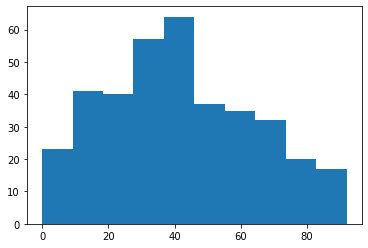

In [57]:
plt.hist(hrd_1)
print(subtype_1)

In [140]:
hierarchical_cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')

In [141]:
labels = hierarchical_cluster.fit_predict(data)

In [142]:
pca = PCA(n_components=2)
#data_2d = pca.fit_transform(res_hrd_genes_t_fil)
data_2d = pca.fit_transform(data)

In [144]:
hrd_0 = list()
hrd_1 = list()
for i,val in enumerate(labels):
    if val == 0:
        hrd_0.append(hrds_values[i])
    elif val == 1:
        hrd_1.append(hrds_values[i])
mask0 = labels == 0
mask1 = labels == 1

In [145]:
cmap = plt.cm.get_cmap('RdBu')

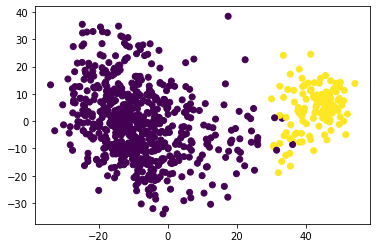

In [146]:
plt.scatter(data_2d[:, 0], data_2d[:, 1], c = labels)
plt.show()

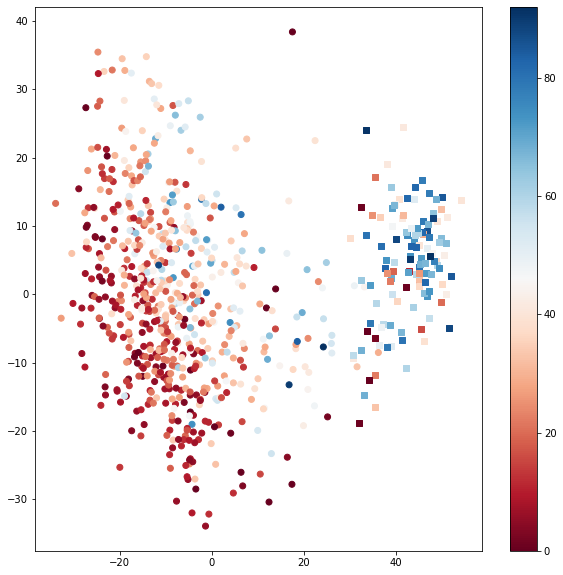

In [147]:
plt.figure(figsize=(10,10))
plt.scatter(data_2d[mask0, 0], data_2d[mask0, 1], c=hrd_0, cmap=cmap, marker='o', label='label 0')
plt.scatter(data_2d[mask1, 0], data_2d[mask1, 1], c=hrd_1, cmap=cmap, marker='s', label='label 1')
plt.colorbar()

In [122]:
print(silhouette_score(data,labels))
print(silhouette_score(data,cluster_assignments))

0.21755930391872186
0.21755930391872186


# SVD

In [5]:
#data = res_hrd_genes_t.copy()
data = res_all_t.copy()
#data = res_hrd_genes_t_fil.copy()

In [6]:
svd = TruncatedSVD(n_components=2)
# prepare transform on dataset
svd.fit(data)
# apply transform to dataset
transformed = svd.transform(data)

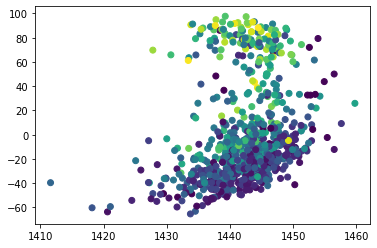

In [7]:
plt.scatter(transformed[:, 0], transformed[:, 1], c = hrds_values)
plt.show()

# Leave one out Clustering

In [135]:
#data = res_hrd_genes_t.copy()
#data = res_all_t.copy()
#data = res_hrd_genes_t_fil.copy()
data = res_all_t_fil.copy()
running = True
num_clusters = 2

linkage_data = linkage(data, method='ward', metric='euclidean')
cluster_assignments = fcluster(linkage_data, num_clusters, criterion='maxclust')
og_sil_score = silhouette_score(data,cluster_assignments)

data_copy = data.copy()
deleted = list()
iteration = 1

while(running):
    print(iteration)
    sil_scores = list()
    for i,col in enumerate(data_copy):
        sub_df = data_copy.drop(columns = col)
        linkage_data = linkage(sub_df, method='ward', metric='euclidean')
        cluster_assignments = fcluster(linkage_data, num_clusters, criterion='maxclust')
        sil_score = silhouette_score(sub_df,cluster_assignments)
        sil_scores.append(sil_score)
    max_score = max(sil_scores)
    max_idx = sil_scores.index(max_score)
    if max_score >= og_sil_score:
        og_sil_score = max_score
        genes = list(data_copy.columns)
        del_gene = genes[max_idx]
        data_copy = data_copy.drop(columns = del_gene)
        deleted.append(del_gene)
    else:
        running = False
        print(og_sil_score)
        print(len(deleted))
        print(deleted)
        results_df = data_copy.copy()
    iteration = iteration + 1

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57


KeyboardInterrupt: 

In [ ]:
# Run with hrdgenes:
#0.1871394906373946
#3
#['RAD17', 'GEN1', 'BTBD12']

In [136]:
og_sil_score

0.2538428858776915

In [148]:
print(deleted)

['MUC6', 'CLEC3A', 'CPB1', 'LTF', 'GRIA2', 'SERPINA6', 'PEG10', 'BMPR1B', 'CYP2A6', 'MUCL1', 'CBLN2', 'SLC30A8', 'MUC5B', 'NPY1R', 'UGT2B11', 'VSTM2A', 'SCGB1D2', 'SYT13', 'TAT', 'CLIC6', 'MYBPC1', 'SLITRK6', 'NLRP2', 'BEX1', 'CARTPT', 'DCD', 'LRP2', 'ADH1B', 'PPP1R1B', 'MUC2', 'GSTM1', 'VTCN1', 'CYP2A7', 'KCNC2', 'S100A7', 'FAM5C', 'CRISP3', 'KCNJ3', 'IGJ', 'ALB', 'SLC6A4', 'LRP1B', 'S100P', 'WFDC2', 'ADIPOQ', 'TCN1', 'CLCA2', 'PPP2R2C', 'FABP4', 'ASCL1', 'NDP', 'PVALB', 'CHGB', 'MKX', 'SLC5A8', 'CXCL13']


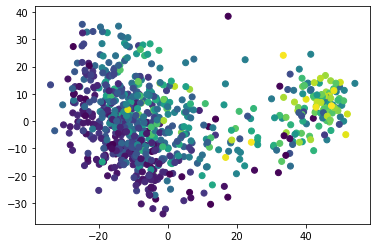

In [150]:
sub_df = res_all_t_fil.drop(columns = deleted)
pca = PCA(n_components=2)
#data_2d = pca.fit_transform(res_hrd_genes_t_fil)
data_2d = pca.fit_transform(data)

plt.scatter(data_2d[:, 0], data_2d[:, 1], c = hrds_values)
plt.show()

# Consensus Clustering